## Final project
### Ocular Disease Intelligent Recognition (ODIR)



In [891]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor

url = 'https://raw.githubusercontent.com/BarMizrahi96/Ocular-Disease-Recognition/main/full_df.csv'

In [892]:
data = pd.read_csv(url)

In [893]:
data.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


## Data explanation
Our data presents a data set of patients of different ages on eye diseases according to the following columns: Sex, Age, Right Eye Diagnostic, Left Eye Diagnostic, Normal (N),
Diabetes (D),Glaucoma (G),Cataract (C),Age related Macular Degeneration(A),
Hypertension (H),Pathological Myopia (M),Other diseases/abnormalities (O).
The "Left-Diagnostic Keywords" & "Right-Diagnostic Keywords" columns are diagnoses by doctors, columns by letter represent the prediction of the disease each patient has, the predictions were made by trained human readers with quality control management.

There are 5 columns we chose to remove -
"labels","target" - columns that were added to the original data, to showcase the data in a different format, however the values inside these columes were wrriten with mistakes (human factor). * We knew that due to the comments we saw on the discussion catagory in the website we took the data from. 
The columns "filename","filepath","Left-Fundus","Right-Fundus" are columns that describe the file location of the image and are therefore are irrelevant to us.

We created a new filename for oue data only with the relevant data.

In [894]:
data_rel = data[['ID', 'Patient Age','Patient Sex','Left-Diagnostic Keywords','Right-Diagnostic Keywords','N','D','G','C','A','H','M','O']].copy()
data_rel.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0


We checked for null values in our data.

In [895]:
data_rel.isnull().sum().sort_values(ascending=False)

O                            0
M                            0
H                            0
A                            0
C                            0
G                            0
D                            0
N                            0
Right-Diagnostic Keywords    0
Left-Diagnostic Keywords     0
Patient Sex                  0
Patient Age                  0
ID                           0
dtype: int64

## Percentage of male vs female patient

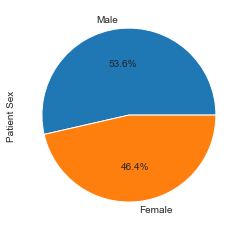

In [896]:
data['Patient Sex'].value_counts().plot.pie(autopct='%1.1f%%')

## Number_of_diseases column
We created a new column named "Number_of_diseases". The value inside this column is per patient, and it showcase the prediction of number of diseases, from column "D" - "O". it does not inculude column "N", because "N" means normal (no disease). 

In [897]:
arr = data_rel.loc[:, 'D':'O'].to_numpy()
print(arr)
data_rel["Number_of_diseases"] = np.sum(arr, axis=1)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [898]:
data_rel.head()

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,Number_of_diseases
0,0,69,Female,cataract,normal fundus,0,0,0,1,0,0,0,0,1
1,1,57,Male,normal fundus,normal fundus,1,0,0,0,0,0,0,0,0
2,2,42,Male,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,2
3,4,53,Male,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,2
4,5,50,Female,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,1


## Patients age distribution
As we can see the majority of the patients are between the ages of 40-80 years old. <br />
The median for patient age is a bit bellow 60. 

(array([  28.,    8.,   29.,  223.,  589., 1378., 2057., 1511.,  486.,
          83.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <a list of 10 Patch objects>)

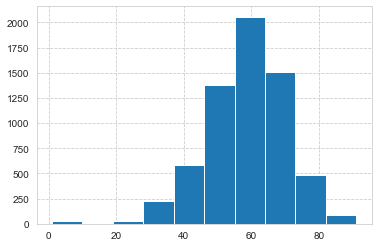

In [899]:
plt.hist(data_rel["Patient Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f90dda3a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f90dd99190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f90dda3730>],
 'medians': [<matplotlib.lines.Line2D at 0x1f90dd99850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f90dd99b50>],
 'means': []}

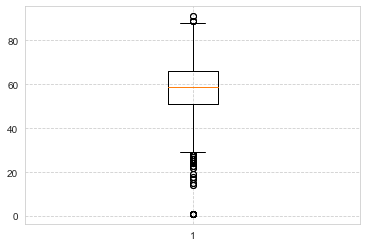

In [900]:
plt.boxplot(data_rel['Patient Age'])

## First conclusion
The majority of the patients regardless of sex have only 1 disease.<br />
Forthermore we can see that there is no major diffrence in the number of diseases regarding to sex.

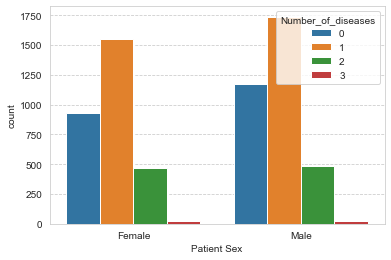

In [901]:
sns.countplot(x='Patient Sex', hue='Number_of_diseases', data=data_rel)

In [902]:
data_only_with_d = data_rel[data_rel.Number_of_diseases > 0].copy()

### Group Age column
We created a new column named "Group Age" that will classifie the patient to proper age group. 
We devided the patients into three age groups.

In [903]:
data_rel["Group Age"] = pd.cut(data_rel['Patient Age'], 3, labels=['0-31','31-61','>61'])

In [904]:
print(pd.value_counts(data_rel['Group Age']))
pd.value_counts(data_rel['Group Age']) / data_rel.shape[0]

31-61    3719
>61      2552
0-31      121
Name: Group Age, dtype: int64


31-61    0.581821
>61      0.399249
0-31     0.018930
Name: Group Age, dtype: float64

## Second conclusion
For males as they age the number of diseases will rise.<br />
The difference in the number of disease between male & female is only significant in the 0-31 age group (females have more eye diseases than males)

In [905]:
b = data_rel.groupby(['Group Age', 'Patient Sex'])['Number_of_diseases'].mean().reset_index()
b

,Group Age,Patient Sex,Number_of_diseases
0,0-31,Female,0.909091
1,0-31,Male,0.709091
2,31-61,Female,0.807717
3,31-61,Male,0.774030
4,>61,Female,0.916110
5,>61,Male,0.891286


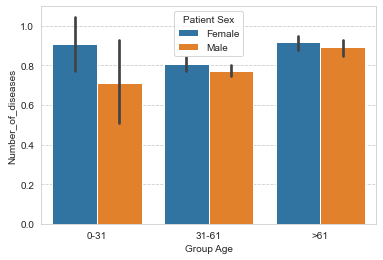

In [906]:
sns.barplot(x='Group Age', y='Number_of_diseases', hue='Patient Sex', data=data_rel)

## Third conclusion
##### Remark: we used the average due to the fact that the number of male and female patient is not equale, and the same goes for the group age clasification. Mean normalized the data.<br /> 
Glaucoma - we can see that there is an increase with the average of the male patient as they get older.<br />

Diabetes - in all the group ages the male average for Diabetes ishigher than the female.<br />

Cataract - for females: in the age group of 0 - 31 there is no presence of cataract. For 31-61 there is a rise in precentege of female with cataract and in the >61 group age there is a sharp rise in the precentage of females with cataract.<br /> 

Other diseases/abnormalities - we can see that there is an  slite increase with the average of the female patients as they get older.<br />  

Age related Macular Degeneration - for females: we can see that there is an  slite increase with the average of the female patients as they get older.
For males: in the age group of 0 - 31 there is no presence of Age related Macular Degeneration. For 31-61 there is a rise in precentege of male with Age related Macular Degeneration and in the >61 group age there is a sharp rise in the precentage of males with Age related Macular Degeneration.<br />  

Hypertension - in the group age of 0-31 there is no presence of Hypertension in both male & female. In the gropu age of 31-61 the male average is twice as high than the female avarege.<br />        

Pathological Myopia - in the group age of 0-31 the female avarage is at his highest peak at 0.4. the rest of the averages both for male and female in all of the other group ages goes from 0.1 to 0.0.


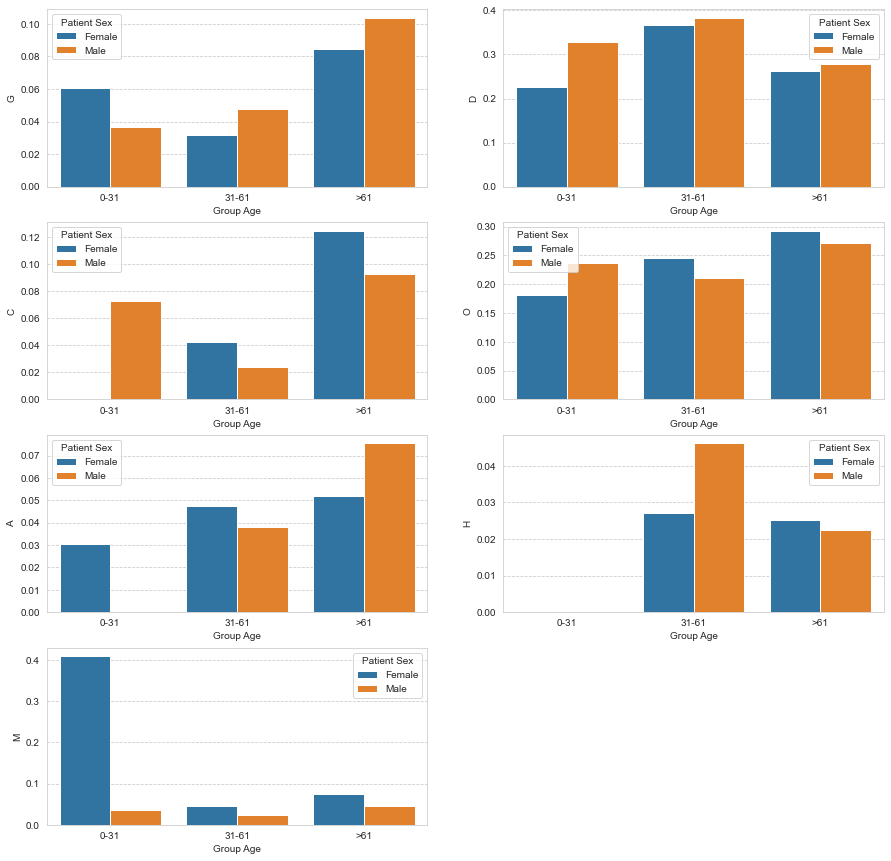

In [907]:
plt.figure(figsize = (15,15))
plt.subplot(4, 2, 1,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['G'].mean().reset_index()
sns.barplot(x='Group Age', y='G', hue='Patient Sex', data=b)
plt.subplot(4, 2, 2,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['D'].mean().reset_index()
sns.barplot(x='Group Age', y='D', hue='Patient Sex', data=b)
plt.subplot(4, 2, 3,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['C'].mean().reset_index()
sns.barplot(x='Group Age', y='C', hue='Patient Sex', data=b)
plt.subplot(4, 2, 4,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['O'].mean().reset_index()
sns.barplot(x='Group Age', y='O', hue='Patient Sex', data=b)
plt.subplot(4, 2, 5,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['A'].mean().reset_index()
sns.barplot(x='Group Age', y='A', hue='Patient Sex', data=b)
plt.subplot(4, 2, 6,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['H'].mean().reset_index()
sns.barplot(x='Group Age', y='H', hue='Patient Sex', data=b)
plt.subplot(4, 2, 7,)
b = data_rel.groupby(['Group Age', 'Patient Sex'])['M'].mean().reset_index()
sns.barplot(x='Group Age', y='M', hue='Patient Sex', data=b)

## 11 most common diagnosis per eye 
We axtracted the 11 most common diagnosis from the columns "Left-Diagnostic Keywords" & "Right-Diagnostic Keywords".<br /> 
We chose the 11 highest value count because we wanted a value count above 100 in both columns. <br /> 
Our boxplot is bulit with the diagnsis (values) for axis X forthermore in this axis each diagnosis is divided to male and female. For axis Y the data is the patient age. 


In [908]:
data_rel['Left-Diagnostic Keywords'].value_counts().head(20)

normal fundus                                                      2796
moderate non proliferative retinopathy                              717
mild nonproliferative retinopathy                                   428
cataract                                                            268
pathological myopia                                                 208
glaucoma                                                            207
dry age-related macular degeneration                                184
severe nonproliferative retinopathy                                 139
drusen                                                              130
hypertensive retinopathy                                            106
epiretinal membrane                                                 106
macular epiretinal membrane                                          97
myelinated nerve fibers                                              60
normal fundus，lens dust                                         

In [909]:
data_rel['Right-Diagnostic Keywords'].value_counts().head(20)

normal fundus                                                      2705
moderate non proliferative retinopathy                              745
mild nonproliferative retinopathy                                   472
cataract                                                            250
pathological myopia                                                 216
dry age-related macular degeneration                                204
glaucoma                                                            190
severe nonproliferative retinopathy                                 147
macular epiretinal membrane                                         141
drusen                                                              140
epiretinal membrane                                                 109
hypertensive retinopathy                                            101
myelinated nerve fibers                                              67
refractive media opacity                                        

In [910]:
data_rel['Left-Diagnostic Keywords'].value_counts().head(11).index.tolist()

['normal fundus',
 'moderate non proliferative retinopathy',
 'mild nonproliferative retinopathy',
 'cataract',
 'pathological myopia',
 'glaucoma',
 'dry age-related macular degeneration',
 'severe nonproliferative retinopathy',
 'drusen',
 'hypertensive retinopathy',
 'epiretinal membrane']

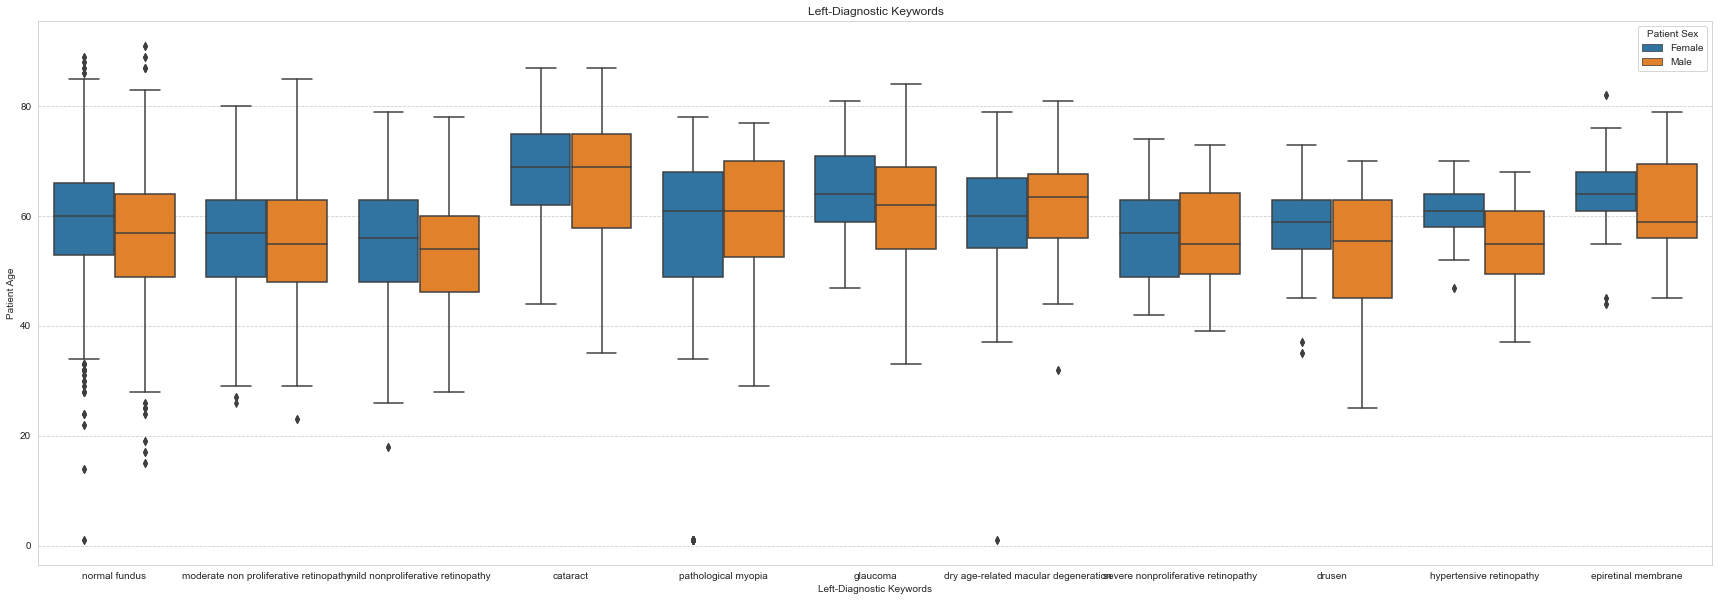

In [911]:
fig = plt.subplots(figsize=(30,10))
plt.title("Left-Diagnostic Keywords")
sns.boxplot(x='Left-Diagnostic Keywords', y="Patient Age", hue="Patient Sex",
                data=data_rel, order=['normal fundus',
 'moderate non proliferative retinopathy',
 'mild nonproliferative retinopathy',
 'cataract',
 'pathological myopia',
 'glaucoma',
 'dry age-related macular degeneration',
 'severe nonproliferative retinopathy',
 'drusen',
 'hypertensive retinopathy',
 'epiretinal membrane'])
plt.show()


In [912]:
data_rel['Right-Diagnostic Keywords'].value_counts().head(11).index.tolist()

['normal fundus',
 'moderate non proliferative retinopathy',
 'mild nonproliferative retinopathy',
 'cataract',
 'pathological myopia',
 'dry age-related macular degeneration',
 'glaucoma',
 'severe nonproliferative retinopathy',
 'macular epiretinal membrane',
 'drusen',
 'epiretinal membrane']

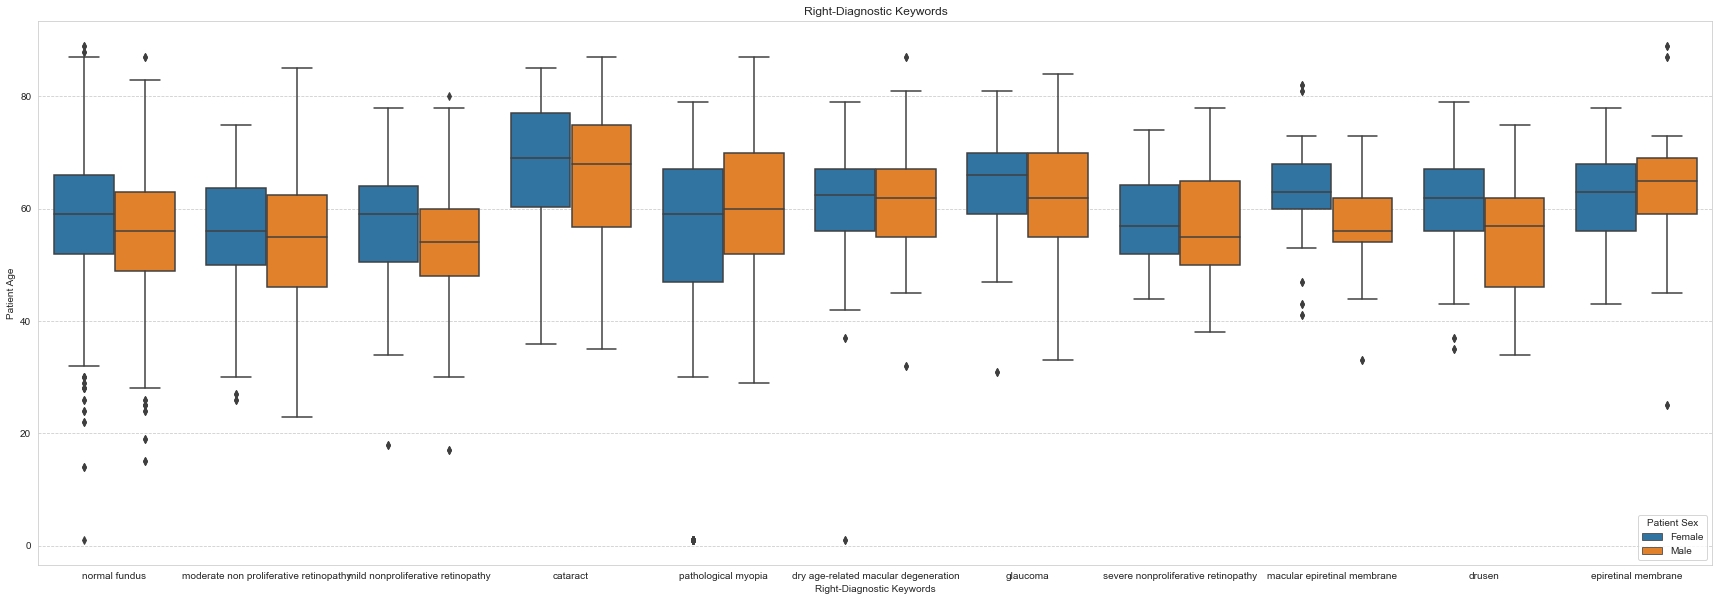

In [913]:
fig = plt.subplots(figsize=(30,10))
plt.title("Right-Diagnostic Keywords")
sns.boxplot(x='Right-Diagnostic Keywords', y="Patient Age", hue="Patient Sex",
                data=data_rel, order=['normal fundus',
 'moderate non proliferative retinopathy',
 'mild nonproliferative retinopathy',
 'cataract',
 'pathological myopia',
 'dry age-related macular degeneration',
 'glaucoma',
 'severe nonproliferative retinopathy',
 'macular epiretinal membrane',
 'drusen',
 'epiretinal membrane'])
plt.show()


## Categorizing the diagnostic columns:
The columns "Left-Diagnostic Keywords" & "Right-Diagnostic Keywords" have many identical values. these values are obj str. We wanted to catagorized them so that a value such as "normal fundus" in the "Left-Diagnostic Keywords" will have the same catagory number in the "Right-Diagnostic Keywords". If we would have uset the cat.code function it will give tha value "normal fundus" a different number catagory in each column. There is no such function existing, therefore we created one to do so.<br /> 
##### When using the classifier tree, it will clasifie by arrows when for example 5> or <5 when the numbers represent the diagnostic, and they are not continuous therefor, the tree model will be incorrect. 

In [914]:
# def categorized(first_column_name, second_column_name):
#     diagnose = {}
#     a = 0
#     for i in data_rel[first_column_name]:
#         if i  not in diagnose:
#             a += 1
#             diagnose[i] = a
#    for i in data_rel[second_column_name]:
#          if i  not in diagnose:
#             a += 1
#             diagnose[i] = a
            
#     # Change the values
#     data_rel[first_column_name] = data_rel[first_column_name].replace(diagnose) 
#     data_rel[second_column_name] = data_rel[second_column_name].replace(diagnose)
#     data_rel[first_column_name].astype("category")
#     data_rel[second_column_name].astype("category")
#     return diagnose

# diagnose = categorized("Left-Diagnostic Keywords", "Right-Diagnostic Keywords")

In [915]:
data_rel['Patient Sex']= data_rel['Patient Sex'].astype('category').cat.codes

#### We used get_dummies and concated the "new data" to a new user name, with that new data we created our tree.DecisionTreeClassifier

In [916]:
diag_dum = pd.get_dummies(data_rel[['Left-Diagnostic Keywords','Right-Diagnostic Keywords']])
data_rel_2 = pd.concat([data_rel.copy(),diag_dum], axis = 1)
data_rel_2

,ID,Patient Age,Patient Sex,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,...,Right-Diagnostic Keywords_vitreous degeneration,Right-Diagnostic Keywords_vitreous degeneration，lens dust,Right-Diagnostic Keywords_vitreous degeneration，mild nonproliferative retinopathy,Right-Diagnostic Keywords_wet age-related macular degeneration,Right-Diagnostic Keywords_wet age-related macular degeneration，diabetic retinopathy,Right-Diagnostic Keywords_wet age-related macular degeneration，glaucoma,Right-Diagnostic Keywords_wet age-related macular degeneration，hypertensive retinopathy,Right-Diagnostic Keywords_white vessel，mild nonproliferative retinopathy,Right-Diagnostic Keywords_white vessel，moderate non proliferative retinopathy,Right-Diagnostic Keywords_white vessel，proliferative diabetic retinopathy，suspected microvascular anomalies
0,0,69,0,cataract,normal fundus,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,57,1,normal fundus,normal fundus,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,42,1,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,53,1,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,50,0,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,1,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6388,4688,42,1,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6389,4689,54,1,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6390,4690,57,1,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tree model and accuracy - fourth conclusion
We created a function that will create a classifier tree for any "label" that we will select. We chose as features the 'Patient Age','Patient Sex','Left-Diagnostic Keywords', 'Right-Diagnostic Keywords' columns and the target will be one of the lettered columns.
We did so in order to see the accuracy that we got for the prediction that the trained human readers with quality control management did. We saw we got a very high accuracy compatible to the classification that the trained humans did.
from that we can assume, that there pradiction the they made from the diagnosis was reliable.

C:\Users\barmi\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\barmi\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


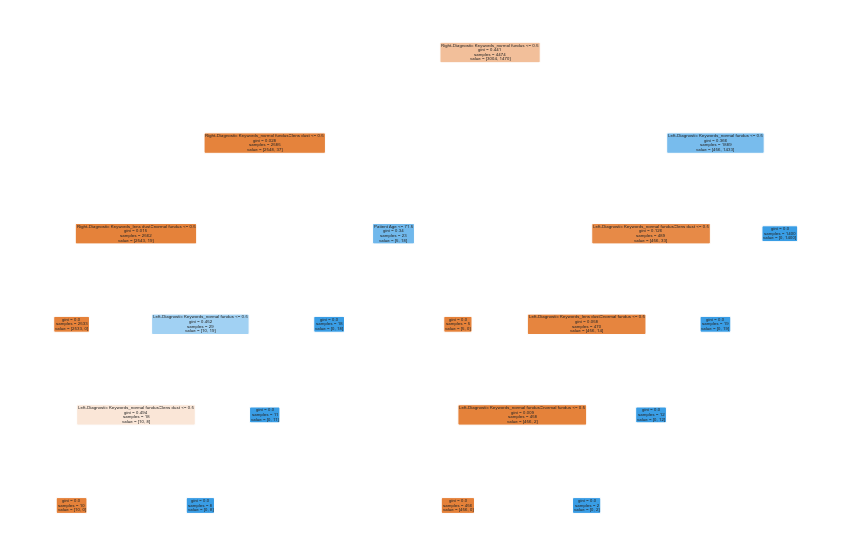

('Acc for the ', ['N'], 'column is:', 0.9989572471324296)

In [917]:
def train_model(label):
    features = ['Patient Age','Patient Sex']
    features += [x for x in data_rel_2.columns if "Diagnostic Keywords_" in x]
    X = data_rel_2[features]
    y = data_rel_2[label]
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=12, random_state=1)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    fig = plt.figure(figsize=(15,10))
    tree.plot_tree(model, 
                   feature_names = features, 
                   filled=True, 
                   rounded = True)  
    plt.show()
    return  "Acc for the ", label, "column is:" ,sk.metrics.accuracy_score(prediction, y_test)

def accuracy_1(label):
    features = ['Patient Age','Patient Sex']
    features += [x for x in data_rel_2.columns if "Diagnostic Keywords_" in x]
    X = data_rel_2[features]
    y = data_rel_2[label]
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=12, random_state=1)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)   
    return  "Acc for the ", label, "column is:" ,sk.metrics.accuracy_score(prediction, y_test) 

train_model(["N"])


In [918]:
print(accuracy_1(["H"]))
print(accuracy_1(["G"]))
print(accuracy_1(["C"]))
print(accuracy_1(["A"]))
print(accuracy_1(["M"]))
print(accuracy_1(["O"]))
print(accuracy_1(["D"]))

('Acc for the ', ['H'], 'column is:', 0.9989572471324296)
('Acc for the ', ['G'], 'column is:', 0.9895724713242962)
('Acc for the ', ['C'], 'column is:', 0.9968717413972888)
('Acc for the ', ['A'], 'column is:', 0.9968717413972888)
('Acc for the ', ['M'], 'column is:', 0.9994786235662148)
('Acc for the ', ['O'], 'column is:', 0.8967674661105318)
('Acc for the ', ['D'], 'column is:', 0.9530761209593326)
